In [1]:
from qubecalib.neopulse import Sequence, Slot

with Sequence() as seq:
    Slot(100e-9)
    Slot(200e-9)
    Slot(300e-9)

seq._tree.place_slots()
seq, seq._tree._nodes_items

(Sequence([Slot(duration=1e-07, begin=0.0),
           Slot(duration=2e-07, begin=1e-07),
           Slot(duration=3e-07, begin=3e-07)]),
 {1: SubSequenceBranch(duration=6e-07, begin=0.0, next_node=1, root_node=2, post_blank=0.0, repeats=1),
  2: Dummy(begin=0.0),
  3: Slot(duration=1e-07, begin=0.0),
  4: Slot(duration=2e-07, begin=1e-07),
  5: Slot(duration=3e-07, begin=3e-07)})

In [3]:
from qubecalib.neopulse import Sequence, SubSequence, Slot, Series, Flushleft, Flushright

with Sequence() as seq:
    with Series():
        Slot(1e-9)
        Slot(2e-9)

seq._tree.place_slots()
seq._tree._nodes_items, seq._get_tree()

({1: SubSequenceBranch(duration=3.0000000000000004e-09, begin=0.0, next_node=1, root_node=2, post_blank=0.0, repeats=1),
  2: Dummy(begin=0.0),
  3: SeriesBranch(duration=3.0000000000000004e-09, begin=0.0, next_node=3, root_node=4),
  4: Dummy(begin=0.0),
  5: Slot(duration=1e-09, begin=0.0),
  6: Slot(duration=2e-09, begin=1.0000000000000003e-09)},
 Tree(list, {0: [1, 2], 2: [3, 4], 4: [5], 5: [6], 1: [], 3: [], 6: []}))

In [4]:
from qubecalib.neopulse import Sequence, SubSequence, Slot, Series, Flushleft, Flushright

with Sequence() as seq:
    with Flushleft():
        Slot(1e-9)
        Slot(2e-9)

seq._tree.place_slots()
seq._tree._nodes_items, seq._get_tree()

({1: SubSequenceBranch(duration=2e-09, begin=0.0, next_node=1, root_node=2, post_blank=0.0, repeats=1),
  2: Dummy(begin=0.0),
  3: FlushleftBranch(duration=2e-09, begin=0.0, next_node=3, root_node=4),
  4: Dummy(begin=0.0),
  5: Slot(duration=1e-09, begin=0.0),
  6: Slot(duration=2e-09, begin=0.0)},
 Tree(list, {0: [1, 2], 2: [3, 4], 4: [5, 6], 1: [], 3: [], 5: [], 6: []}))

In [5]:
from qubecalib.neopulse import Sequence, SubSequence, Slot, Series, Flushleft, Flushright

with Sequence() as seq:
    with Flushright():
        Slot(1e-9)
        Slot(2e-9)

seq._tree.place_slots()
seq._tree._nodes_items, seq._get_tree(), seq._tree._tree._cost

({1: SubSequenceBranch(duration=2e-09, begin=0.0, next_node=1, root_node=2, post_blank=0.0, repeats=1),
  2: Dummy(begin=0.0),
  3: FlushrightBranch(duration=2e-09, begin=0.0, next_node=3, root_node=4),
  4: Dummy(begin=0.0),
  5: Padding(duration=1e-09, begin=0.0),
  7: Padding(duration=0.0, begin=0.0),
  6: Slot(duration=1e-09, begin=1e-09),
  8: Slot(duration=2e-09, begin=0.0)},
 Tree(list,
      {0: [1, 2],
       2: [3, 4],
       4: [5, 7],
       5: [6],
       7: [8],
       1: [],
       3: [],
       6: [],
       8: []}),
 {1: 2e-09, 2: 0, 3: 2e-09, 4: 0, 5: 1e-09, 7: 0.0, 6: 1e-09, 8: 2e-09})

In [3]:
from qubecalib.neopulse import Sequence, SubSequence, Slot, Series, Flushleft, Flushright

with Sequence() as seq:
    with SubSequence():
        Slot(9e-9)
        with Flushright():
            with Series():
                Slot(1e-9)
                Slot(2e-9)
            with Series():
                Slot(3e-9)
                Slot(4e-9)
        with Flushleft():
            with Series():
                Slot(5e-9)
                Slot(6e-9)
            with Series():
                Slot(7e-9)
                Slot(8e-9)

seq._tree.place_slots()
seq._tree._nodes_items, seq._get_tree()#, seq._tree._tree._cost

print(seq._tree._nodes_items)


{1: SubSequenceBranch(duration=3.1e-08, begin=0.0, next_node=1, root_node=2, post_blank=0.0, repeats=1), 2: Dummy(begin=0.0), 3: Slot(duration=9e-09, begin=0.0), 4: FlushrightBranch(duration=7e-09, begin=8.999999999999998e-09, next_node=4, root_node=5), 5: Dummy(begin=9e-09), 16: FlushleftBranch(duration=1.5000000000000002e-08, begin=1.5999999999999998e-08, next_node=16, root_node=17), 17: Dummy(begin=1.5999999999999998e-08), 6: Padding(duration=3.9999999999999994e-09, begin=9e-09), 11: Padding(duration=0.0, begin=9e-09), 18: SeriesBranch(duration=1.1e-08, begin=1.5999999999999998e-08, next_node=18, root_node=19), 19: Dummy(begin=1.5999999999999998e-08), 22: SeriesBranch(duration=1.5000000000000002e-08, begin=1.5999999999999998e-08, next_node=22, root_node=23), 23: Dummy(begin=1.5999999999999998e-08), 7: SeriesBranch(duration=3.0000000000000004e-09, begin=1.2999999999999997e-08, next_node=7, root_node=8), 8: Dummy(begin=1.2999999999999999e-08), 12: SeriesBranch(duration=7e-09, begin=8.

SubSequenceBranch, 0.0, 3.0000000000000004e-09


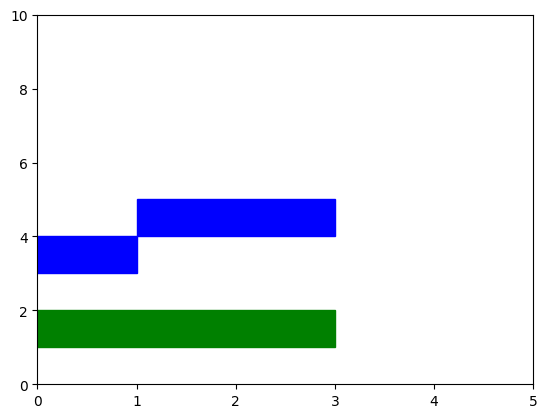

({1: SubSequenceBranch(duration=3.0000000000000004e-09, begin=0.0, next_node=1, root_node=2, post_blank=0.0, repeats=1),
  2: Dummy(begin=0.0),
  3: Slot(duration=1e-09, begin=0.0),
  4: Slot(duration=2e-09, begin=1.0000000000000003e-09)},
 Tree(list, {0: [1, 2], 2: [3], 3: [4], 1: [], 4: []}))

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from qubecalib.neopulse import Sequence, SubSequence, Slot, Series, Flushleft, Flushright, Branch
from qubecalib.neopulse import Sequence, SubSequence, Slot, Series, Flushleft, Flushright

%matplotlib inline

with Sequence() as seq:
    with SubSequence():
        Slot(1e-9)
        Slot(2e-9)

seq._tree.place_slots()

fig = plt.figure()
ax = fig.gca()
for i, _ in seq._tree._nodes_items.items():
    if isinstance(_, Branch):
        print(f"{_.__class__.__name__}, {_.begin}, {_.duration}")
        ax.add_patch(patches.Rectangle(xy=(_.begin*1e9, i), width=_.duration*1e9, height=1, color='green'))
    if isinstance(_, Slot):
        ax.add_patch(patches.Rectangle(xy=(_.begin*1e9, i), width=_.duration*1e9, height=1, color='blue'))
ax.set_xlim(0,5)
ax.set_ylim(0,10)
plt.show()

seq._tree._nodes_items, seq._get_tree()

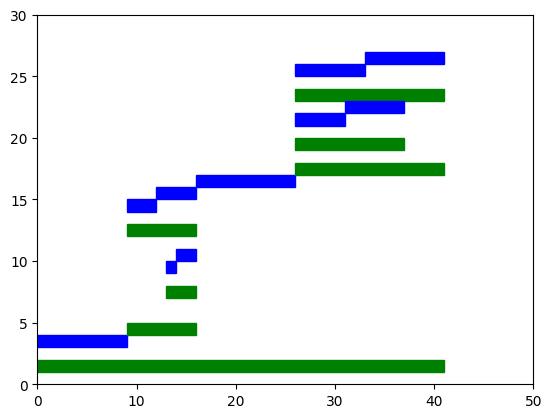

({1: SubSequenceBranch(duration=4.0999999999999997e-08, begin=0.0, next_node=1, root_node=2, post_blank=0.0, repeats=1),
  2: Dummy(begin=0.0),
  3: Slot(duration=9e-09, begin=0.0),
  4: FlushrightBranch(duration=7e-09, begin=8.999999999999998e-09, next_node=4, root_node=5),
  5: Dummy(begin=9e-09),
  16: Slot(duration=1e-08, begin=1.5999999999999998e-08),
  6: Padding(duration=3.9999999999999994e-09, begin=9e-09),
  11: Padding(duration=0.0, begin=9e-09),
  17: FlushleftBranch(duration=1.5000000000000002e-08, begin=2.5999999999999995e-08, next_node=17, root_node=18),
  18: Dummy(begin=2.5999999999999998e-08),
  7: SeriesBranch(duration=3.0000000000000004e-09, begin=1.2999999999999997e-08, next_node=7, root_node=8),
  8: Dummy(begin=1.2999999999999999e-08),
  12: SeriesBranch(duration=7e-09, begin=8.999999999999998e-09, next_node=12, root_node=13),
  13: Dummy(begin=9e-09),
  19: SeriesBranch(duration=1.1e-08, begin=2.6e-08, next_node=19, root_node=20),
  20: Dummy(begin=2.599999999999

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from qubecalib.neopulse import Sequence, SubSequence, Slot, Series, Flushleft, Flushright, Branch
from qubecalib.neopulse import Sequence, SubSequence, Slot, Series, Flushleft, Flushright, RaisedCosFlatTop

%matplotlib inline

with Sequence() as seq:
    with SubSequence():
        Slot(9e-9)
        with Flushright():
            with Series():
                Slot(1e-9)
                Slot(2e-9)
            with Series():
                Slot(3e-9)
                Slot(4e-9)
        Slot(10e-9)
        with Flushleft():
            with Series():
                Slot(5e-9)
                Slot(6e-9)
            with Series():
                Slot(7e-9)
                Slot(8e-9)

seq._tree.place_slots()

fig = plt.figure()
ax = fig.gca()
for i, _ in seq._tree._nodes_items.items():
    if isinstance(_, Branch):
        # print(f"{_.__class__.__name__}, {_.begin}, {_.duration}")
        ax.add_patch(patches.Rectangle(xy=(_.begin*1e9, i), width=_.duration*1e9, height=1, color='green'))
    if isinstance(_, Slot):
        ax.add_patch(patches.Rectangle(xy=(_.begin*1e9, i), width=_.duration*1e9, height=1, color='blue'))
ax.set_xlim(0,50)
ax.set_ylim(0,30)
plt.show()

seq._tree._nodes_items, seq._get_tree()#, seq._tree._tree._cost


In [4]:
import math, cmath
class Test:
    def __init__(self):
        self.amplitude = 1.
        self.phase = 0.
    def __rmul__(self, other: complex):
        p = self.phase / 180. * math.pi
        c = self.amplitude * (math.cos(p) + 1j * math.sin(p))
        r = other * c
        self.amplitude = math.sqrt((r * r.conjugate()).real)
        self.phase = math.atan2(r.imag, r.real)/math.pi * 180
        return self
    def __repr__(self) -> str:
        return f"{self.__class__.__name__}(amplitude={self.amplitude}, phase={self.phase})"


c1 = Test()
0.5 * cmath.exp(1j*math.pi/2) * Test()

Test(amplitude=0.5, phase=90.0)

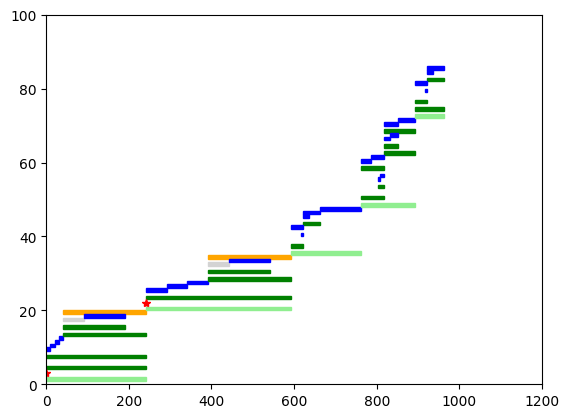

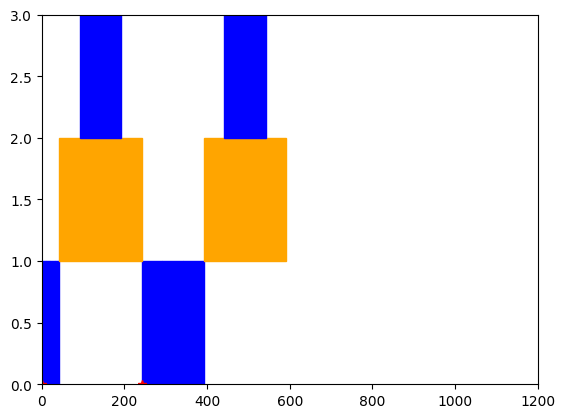

({'CQ1': {1: [Modifier(begin=0.0),
    RaisedCosFlatTop(duration=1.05e-08, begin=0.0),
    RaisedCosFlatTop(duration=1.05e-08, begin=1.05e-08),
    Rectangle(duration=1.05e-08, begin=2.0999999999999996e-08),
    Arbit(duration=1.05e-08, begin=3.15e-08)],
   20: [Modifier(begin=2.4199999999999997e-07),
    Arbit(duration=5e-08, begin=2.4199999999999997e-07),
    RaisedCosFlatTop(duration=5e-08, begin=2.9199999999999997e-07),
    Rectangle(duration=5e-08, begin=3.4199999999999997e-07)],
   35: [],
   48: [],
   72: []},
  'RQ1CAP': {1: [Range(duration=2e-07, begin=4.199999999999998e-08)],
   20: [Range(duration=2e-07, begin=3.92e-07)],
   35: [],
   48: [],
   72: []},
  'RQ1GEN': {1: [RaisedCosFlatTop(duration=1e-07, begin=9.2e-08)],
   20: [RaisedCosFlatTop(duration=1e-07, begin=4.4199999999999996e-07)],
   35: [],
   48: [],
   72: []}},
 {1: SubSequenceBranch(duration=2.4199999999999997e-07, begin=0.0, next_node=1, root_node=2, post_blank=0.0, repeats=1),
  2: Dummy(begin=0.0),
  3: 

In [10]:
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import qubecalib.neopulse as pls
from qubecalib.neopulse import Sequence, SubSequence, Slot, Series, Flushleft, Flushright, RaisedCosFlatTop, TargetHolder, Blank, Range, Branch, SubSequenceBranch
from qubecalib.neopulse import Modifier, RaisedCosFlatTop
from typing import Optional
%matplotlib inline

class THSlot(Slot, TargetHolder):
    def __init__(self, duration: Optional[float] = None) -> None:
        super().__init__(duration)
        TargetHolder.__init__(self)

with Sequence() as seq:
    with SubSequence():
        Modifier().set_target("CQ1")
        with Flushright():
            with Series():
                RaisedCosFlatTop(duration=10.5e-9, rise_time=4e-9).set_target("CQ1")
                RaisedCosFlatTop(duration=10.5e-9, rise_time=4e-9).set_target("CQ1")
                pls.Rectangle(10.5e-9).set_target("CQ1")
                pls.Arbit(10.5e-9).set_target("CQ1")
                with Flushleft():
                    with Series():
                        Blank(50e-9)
                        RaisedCosFlatTop(100e-9).set_target("RQ1GEN")
                    Range(200e-9).set_target("RQ1CAP")
    with SubSequence():
        Modifier().set_target("CQ1")
        # with Flushright():
        with Series():
            pls.Arbit(50e-9).set_target("CQ1")
            RaisedCosFlatTop(50e-9).set_target("CQ1")
            pls.Rectangle(50e-9).set_target("CQ1")
            with Flushleft():
                with Series():
                    Blank(50e-9)
                    RaisedCosFlatTop(100e-9).set_target("RQ1GEN")
                Range(200e-9).set_target("RQ1CAP")
    # Sequence のトップレベルテスト
    with Flushright():
        Slot(5e-9)
        Slot(30e-9)
    with Flushleft():
        Slot(15e-9)
        Slot(40e-9)
    Slot(100e-9)
    # SubSequence の入れ子テスト
    with SubSequence():
        # Flushright の入れ子テスト
        with Flushright():
            with Series():
                Slot(5e-9)
                Slot(10e-9)
            with Series():
                Slot(25e-9)
                Slot(30e-9)
        # Flushleft の入れ子テスト
        with Flushleft():
            with Series():
                Slot(15e-9)
                Slot(20e-9)
            with Series():
                Slot(35e-9)
                Slot(40e-9)
    # Series の入れ子テスト
    with Series():
        # Flushright の入れ子テスト
        with Flushright():
            Slot(5e-9)
            Slot(30e-9)
        # Flushleft の入れ子テスト
        with Flushleft():
            Slot(15e-9)
            Slot(40e-9)

seq._tree.place_slots()

fig = plt.figure()
ax = fig.gca()
for i, _ in seq._tree._nodes_items.items():
    if isinstance(_, SubSequenceBranch):
        ax.add_patch(patches.Rectangle(xy=(_.begin*1e9, i), width=_.duration*1e9, height=1, color='lightgreen'))
        continue
    if isinstance(_, Branch):
        ax.add_patch(patches.Rectangle(xy=(_.begin*1e9, i), width=_.duration*1e9, height=1, color='green'))
        continue
    if isinstance(_, Blank):
        ax.add_patch(patches.Rectangle(xy=(_.begin*1e9, i), width=_.duration*1e9, height=1, color='lightgray'))
        continue
    if isinstance(_, Range):
        ax.add_patch(patches.Rectangle(xy=(_.begin*1e9, i), width=_.duration*1e9, height=1, color='orange'))
        continue
    if isinstance(_, Modifier):
        ax.plot(_.begin*1e9, i, '*', color='red')
        continue
    if isinstance(_, Slot):
        ax.add_patch(patches.Rectangle(xy=(_.begin*1e9, i), width=_.duration*1e9, height=1, color='blue'))
        continue
ax.set_xlim(0,1200)
ax.set_ylim(0,100)
plt.show()

targets_items = seq._get_group_items_by_target()
nodes_items = seq._tree._nodes_items

fig = plt.figure()
ax = fig.gca()
target_counter = 0
for targets, items in targets_items.items():
    for node, _items in items.items():
        for _ in _items:
            if isinstance(_, Modifier):
                ax.plot(_.begin*1e9, target_counter, '*', color='red')
                continue
            if isinstance(_, Branch):
                ax.add_patch(patches.Rectangle(xy=(_.begin*1e9, target_counter), width=_.duration*1e9, height=1, color='green'))
                continue
            if isinstance(_, Blank):
                ax.add_patch(patches.Rectangle(xy=(_.begin*1e9, target_counter), width=_.duration*1e9, height=1, color='lightgray'))
                continue
            if isinstance(_, Range):
                ax.add_patch(patches.Rectangle(xy=(_.begin*1e9, target_counter), width=_.duration*1e9, height=1, color='orange'))
                continue
            if isinstance(_, Slot):
                ax.add_patch(patches.Rectangle(xy=(_.begin*1e9, target_counter), width=_.duration*1e9, height=1, color='blue'))
                continue
    target_counter += 1
ax.set_xlim(0,1200)
ax.set_ylim(0,len(targets_items))
plt.show()

targets_items, nodes_items, seq._tree._tree._tree

# seq からサンプリングデータを作る実験兼テストコード

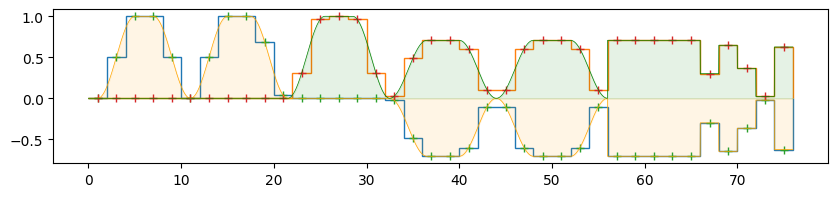

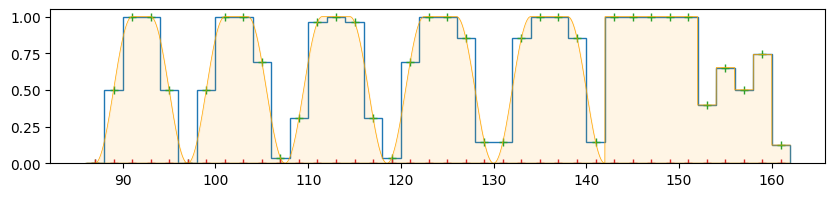

({'CQ1': {1: [Rectangle(duration=1e-08, begin=5.6e-08),
    Arbit(duration=1e-08, begin=6.6e-08),
    RaisedCosFlatTop(duration=1e-08, begin=9.999999999999957e-10),
    RaisedCosFlatTop(duration=1.05e-08, begin=1.0999999999999994e-08),
    VirtualZ(begin=2.1499999999999994e-08),
    RaisedCosFlatTop(duration=1.1e-08, begin=2.1499999999999994e-08),
    VirtualZ(begin=3.249999999999999e-08),
    RaisedCosFlatTop(duration=1.15e-08, begin=3.249999999999999e-08),
    RaisedCosFlatTop(duration=1.2e-08, begin=4.4e-08)],
   19: [],
   22: [Rectangle(duration=1e-08, begin=1.4199999999999997e-07),
    Arbit(duration=1e-08, begin=1.5199999999999998e-07),
    RaisedCosFlatTop(duration=1e-08, begin=8.699999999999998e-08),
    RaisedCosFlatTop(duration=1.05e-08, begin=9.699999999999998e-08),
    RaisedCosFlatTop(duration=1.1e-08, begin=1.0749999999999998e-07),
    RaisedCosFlatTop(duration=1.15e-08, begin=1.1849999999999997e-07),
    RaisedCosFlatTop(duration=1.2e-08, begin=1.2999999999999997e-07)],

In [2]:
import numpy as np
from numpy.typing import NDArray
import matplotlib as mpl
import matplotlib.pyplot as plt
import qubecalib.neopulse as pls
from qubecalib.neopulse import Sequence, SubSequence, Slot, Series, Flushleft, Flushright, RaisedCosFlatTop, TargetHolder, Blank, Range, Branch, SubSequenceBranch
from qubecalib.neopulse import Modifier, RaisedCosFlatTop, VirtualZ
from qubecalib.units import Units as U
from typing import Optional, List
%matplotlib inline

# e7 用の小技
# SubSequence の最初を Flushleft + Blank で始めると SubSequence の長さを 16 words (64 amples, 128 ns) に
# アライメントしやすい．e7 の WaveChunk と 1:1 で対応するのでわかりやすい．

with Sequence() as seq:
    with SubSequence():
        with Flushright():
            # 例えばこの後の Rectangle をバシッと出したい場合 Rectangle が 2ns にアライメントされるように入れる
            Blank(duration=56e-9)
            with Series():
                RaisedCosFlatTop(duration=10e-9, rise_time=4e-9).set_target("CQ1")
                RaisedCosFlatTop(duration=10.5e-9, rise_time=4e-9).set_target("CQ1")
                VirtualZ(theta=90*U.DEG).set_target("CQ1")
                RaisedCosFlatTop(duration=11.0e-9, rise_time=4e-9).set_target("CQ1")
                VirtualZ(theta=45*U.DEG).set_target("CQ1")
                RaisedCosFlatTop(duration=11.5e-9, rise_time=4e-9).set_target("CQ1")
                RaisedCosFlatTop(duration=12.0e-9, rise_time=4e-9).set_target("CQ1")
        pls.Rectangle(10e-9).set_target("CQ1")
        a = pls.Arbit(10e-9).set_target("CQ1")
    Blank(duration=10e-9)
    with SubSequence():
        with Flushright():
            # 例えばこの後の Rectangle をバシッと出したい場合 Rectangle が 2ns にアライメントされるように入れる
            Blank(duration=56e-9)
            with Series():
                RaisedCosFlatTop(duration=10e-9, rise_time=4e-9).set_target("CQ1")
                RaisedCosFlatTop(duration=10.5e-9, rise_time=4e-9).set_target("CQ1")
                RaisedCosFlatTop(duration=11.0e-9, rise_time=4e-9).set_target("CQ1")
                RaisedCosFlatTop(duration=11.5e-9, rise_time=4e-9).set_target("CQ1")
                RaisedCosFlatTop(duration=12.0e-9, rise_time=4e-9).set_target("CQ1")
        pls.Rectangle(10e-9).set_target("CQ1")
        b = pls.Arbit(10e-9).set_target("CQ1")
    Blank(duration=10e-9)

a.iq[:] = np.random.rand(*a.iq.shape)
b.iq[:] = np.random.rand(*b.iq.shape)

seq._tree.place_slots()

targets_items = seq._get_group_items_by_target()
nodes_items = seq._tree._nodes_items

subseq_nodes = [node for node, _ in targets_items["CQ1"].items() if _]
for subseq_node in subseq_nodes:
    # subseq_node = [node for node, _ in targets_items["CQ1"].items() if _][1]
    subseq = nodes_items[subseq_node]
    slots = targets_items["CQ1"][subseq_node]

    sampler = pls.Sampler(subseq, slots)
    v, t, ts = sampler.sample(
        over_sampling_ratio = 1,
        difference_type="center",
    )

    fig = plt.figure(figsize=(10, 2))
    ax = plt.gca()

    ax.stairs(np.real(v), edges=t*1e+9, linewidth=1)
    ax.stairs(np.imag(v), edges=t*1e+9, linewidth=1)
    ax.locator_params(axis="x", nbins=len(t)-1)
    ax.plot(ts*1e+9, np.real(v), "+")
    ax.plot(ts*1e+9, np.imag(v), "+")

    v, t, _ = sampler.sample(
        over_sampling_ratio = 100,
        difference_type="back",
    )

    ax.plot(t*1e+9, np.real(v), color="orange", linewidth=0.5)
    ax.plot(t*1e+9, np.imag(v), color="green", linewidth=0.5)
    # # plt.plot(t*1e+9, np.imag(v), linewidth=0.5)
    ax.fill_between(t*1e+9, np.real(v), color="orange", alpha=0.1)
    ax.fill_between(t*1e+9, np.imag(v), color="green", alpha=0.1)

    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
    # ax.set(xlabel=type(ax.xaxis.get_major_locator()))
    plt.show()

targets_items, nodes_items, seq._tree._tree._tree

# SampledSequence を生成する実験コード

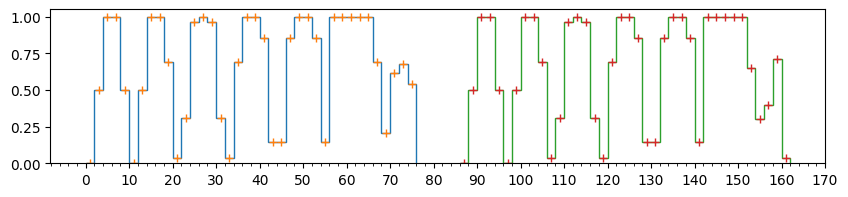

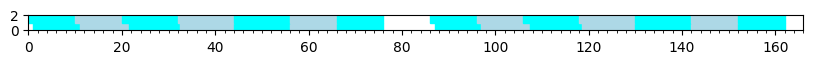

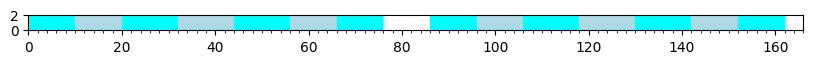

({'prev_blank': 0.0,
  'sub_sequences': [{'real': array([0.        , 0.5       , 1.        , 1.        , 0.5       ,
           0.        , 0.5       , 1.        , 1.        , 0.69134172,
           0.03806023, 0.30865828, 0.96193977, 1.        , 0.96193977,
           0.30865828, 0.03806023, 0.69134172, 1.        , 1.        ,
           0.85355339, 0.14644661, 0.14644661, 0.85355339, 1.        ,
           1.        , 0.85355339, 0.14644661, 1.        , 1.        ,
           1.        , 1.        , 1.        , 0.68837413, 0.20961985,
           0.6142892 , 0.67354737, 0.53798719]),
    'imag': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0.]),
    'repeats': None,
    'post_blank': 1.000000000000001e-08},
   {'real': array([0.        , 0.5       , 1.        , 1.        , 0.5       ,
           0.        , 0.5       , 1.        , 1.        , 0.69134172,


In [6]:
import math
import numpy as np
from numpy.typing import NDArray
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import qubecalib.neopulse as pls
from qubecalib.neopulse import Sequence, SubSequence, Slot, Series, Flushleft, Flushright, RaisedCosFlatTop, TargetHolder, Blank, Range, Branch, SubSequenceBranch
from qubecalib.neopulse import Modifier, RaisedCosFlatTop, Item
from typing import Optional, List, Tuple
%matplotlib inline

# e7 用の小技
# SubSequence の最初を Flushleft + Blank で始めると SubSequence の長さを 16 words (64 amples, 128 ns) に
# アライメントしやすい．e7 の WaveChunk と 1:1 で対応するのでわかりやすい．

with Sequence() as seq:
    with SubSequence(repeats=10):
        with Flushright():
            # 例えばこの後の Rectangle をバシッと出したい場合 Rectangle が 2ns にアライメントされるように入れる
            Blank(duration=56e-9)
            with Series():
                RaisedCosFlatTop(duration=10e-9, rise_time=4e-9).set_target("CQ1")
                RaisedCosFlatTop(duration=10.5e-9, rise_time=4e-9).set_target("CQ1")
                RaisedCosFlatTop(duration=11.0e-9, rise_time=4e-9).set_target("CQ1")
                RaisedCosFlatTop(duration=11.5e-9, rise_time=4e-9).set_target("CQ1")
                RaisedCosFlatTop(duration=12.0e-9, rise_time=4e-9).set_target("CQ1")
        pls.Rectangle(10e-9).set_target("CQ1")
        a = pls.Arbit(10e-9).set_target("CQ1")
    Blank(duration=10e-9)
    with SubSequence():
        with Flushright():
            # 例えばこの後の Rectangle をバシッと出したい場合 Rectangle が 2ns にアライメントされるように入れる
            Blank(duration=56e-9)
            with Series():
                RaisedCosFlatTop(duration=10e-9, rise_time=4e-9).set_target("CQ1")
                RaisedCosFlatTop(duration=10.5e-9, rise_time=4e-9).set_target("CQ1")
                RaisedCosFlatTop(duration=11.0e-9, rise_time=4e-9).set_target("CQ1")
                RaisedCosFlatTop(duration=11.5e-9, rise_time=4e-9).set_target("CQ1")
                RaisedCosFlatTop(duration=12.0e-9, rise_time=4e-9).set_target("CQ1")
        pls.Rectangle(10e-9).set_target("CQ1")
        b = pls.Arbit(10e-9).set_target("CQ1")
    Blank(duration=10e-9)

a.iq[:] = np.random.rand(*a.iq.shape)
b.iq[:] = np.random.rand(*b.iq.shape)

seq._tree.place_slots()

targets_items = seq._get_group_items_by_target()
edges_items = seq._tree._nodes_items

item = targets_items["CQ1"]
subseq_nodes = [node for node, _ in item.items() if _]

# targets_items = {target: [{subseq_edge: [slot, ...]}, ...], ...}
# edges_items = {edge: Item}

fig = plt.figure(figsize=(10, 2))
ax = plt.gca()

for subseq_node in subseq_nodes:

    subseq = edges_items[subseq_node]
    slots = item[subseq_node]

    sampler = pls.Sampler(subseq, slots)
    v, t, ts = sampler.sample(
        over_sampling_ratio = 1,
        difference_type="center",
    )

    ax.stairs(np.real(v), edges=t*1e+9, linewidth=1)
    ax.locator_params(axis="x", nbins=len(t)-1)
    ax.plot(ts*1e+9, np.real(v), "+")

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(5))
plt.show()

# TODO 全体の長さが決まったら最後の subsection の post_blank も決まる？
# 任意の長さにしたいときは空の wave_chunk を追加すればいい？

# target, targets_items, nodes_items

def align_items(
    items: List[Item],
    sampling_period: float=2e-9,
) -> List[Item]:
    """範囲を要素以下の最も近い数値に丸める"""
    dt = sampling_period
    return [pls.Item(duration=pls.floor(_.end, dt) - pls.floor(_.begin, dt), begin=pls.floor(_.begin, dt)) for _ in items]

def convert_ranges_to_nodes(
        ranges: List[Tuple[float, float]],
        begin: float=0,
        end: Optional[float]=None,
) -> List[float]:
    return sorted(sum([[begin,],] + [[_begin, _end] for _begin, _end in ranges] + [[end,],], []))

def convert_ranges_to_edges(
    ranges: List[Tuple[float, float]],
    begin: float=0,
    end: Optional[float]=None,
) -> List[float]:
    nodes = convert_ranges_to_nodes(ranges, begin, end)
    if end is None:
        edges = sum([_end - _begin for _begin, _end in zip(nodes[:-1:],nodes[1::])] + [None,], []) # + [end - nodes[-1] if end is not None else None,]
    else:
        edges = [_end - _begin for _begin, _end in zip(nodes[:-2:],nodes[1:-1:])] # + [end - nodes[-1] if end is not None else None,]
    return edges

target = "CQ1"
item = targets_items[target]
subseq_edges = [edge for edge, _ in item.items() if _] # waveform を保持する subseq の edge_number
subseqs = [edges_items[_] for _ in subseq_edges]
subseq_edge = subseq_edges[0]
subseq = subseqs[subseq_edge]
slots = sorted(item[subseq_edge], key=lambda x: x.begin)

nodes = sum([[_.begin, _.end] for _ in subseqs], [0.,])
blanks = [end - begin for begin, end in zip(nodes[:-1:2], nodes[1::2])] + [None,]
# blanks = [nodes[idx+1] - nodes[idx] for idx, begin in enumerate(nodes[:-1:2])] + [None,]

sampled_subsequences = [
    {
        "real": np.real(v),
        "imag": np.imag(v),
        "repeats": repeat,
    } for (v, _, _), repeat in [
        (
            pls.Sampler(edges_items[_], item[_]).sample(over_sampling_ratio=1, difference_type="center"), edges_items[_].repeats
        )
        for _ in subseq_edges
    ]
]

gen_ss = {
    "prev_blank": blanks[0],
    "sub_sequences": [
        sampled | {
            "post_blank": post_blank,
            "repeats": None,
        }
        for sampled, post_blank in zip(sampled_subsequences, blanks[1:])
    ],
    "post_blank": None,
    "repeats": None,
    "class": "GenSampledSequence",
}


# ---------------------------------
# Capture 向け SampledSequence の生成
# ---------------------------------

target = "CQ1"
item = targets_items[target]
subseq_edges = [edge for edge, _ in item.items() if _] # waveform を保持する subseq の edge_number
subseqs = [edges_items[_] for _ in subseq_edges]
subseq_edge = subseq_edges[0]
subseq = subseqs[subseq_edge]
slots = sorted(item[subseq_edge], key=lambda x: x.begin)

fig = plt.figure(figsize=(10, 0.2))
ax = fig.gca()

for subseq_edge in subseq_edges:
    slots = sorted(item[subseq_edge], key=lambda x: x.begin)
    for i, _ in enumerate(slots):
        if isinstance(_, Slot):
            ax.add_patch(patches.Rectangle(xy=(_.begin*1e9, 0), width=_.duration*1e9, height=1, color='lightblue' if i % 2 else 'cyan'))
            continue
    for i, _ in enumerate(align_items(slots)):
        if isinstance(_, pls.Item):
            ax.add_patch(patches.Rectangle(xy=(_.begin*1e9, 1), width=_.duration*1e9, height=1, color='lightblue' if i % 2 else 'cyan'))
            continue
_max = max([_.end for __ in subseq_edges for _ in sorted(item[__], key=lambda x: x.begin)]) * 1e+9
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(20))
ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(10))
ax.set_xlim(0, _max + 4)
ax.set_ylim(0, 2)
plt.show()

# subseq の境界をサンプリング周期にアライメントする（負の無限大へ丸める）
_subseqs = align_items(sorted([_ for _ in subseqs], key = lambda x: x.begin))
# 全体の領域長も含めてノードを抽出する
nodes = sum([[0.,],] + [[_.begin, _.end] for _ in subseqs] + [[None,],], [])
# 奇数 edge 長を blank, 偶数 edge 長を sub_sequence 長として抽出
blanks = [end - begin if end is not None and begin is not None else None for begin, end in zip(nodes[:-1:2],nodes[1::2])]

def create_durations_and_blanks(
    ranges: Tuple[pls.Item],
    subseq: pls.SubSequenceBranch
):
    items = sorted(ranges, key=lambda x: x.begin)
    _items = align_items(items)
    _durations = [_.duration for _ in _items]
    _blanks = [
        post.begin - prev.end
        for prev, post in zip(_items[:-1], _items[1:])
    ] + [
        subseq.end - _items[-1].end,
    ]
    return _durations, _blanks

cap_ss = {
    "prev_blank": blanks[0],
    "sub_sequences": [
        {
            "capture_slots": [
                {
                    "duration": duration,
                    "post_blank": blank,
                }
                for duration, blank in zip(*create_durations_and_blanks(slots,subseq))
            ],
            "post_blank": blank,
            "repeats": None,
        }
        for blank in blanks[1:]
    ],
    "post_blank": None,
    "repeats": None,
    "class": "CapSampledSequence",
}

durations = [cap_ss["prev_blank"],]
durations += sum(
    [
        sum(
            [
                [_["duration"], _["post_blank"]]
                for _ in __["capture_slots"]
            ] + [[0., __["post_blank"]],], []
        )
        for __ in cap_ss["sub_sequences"]
    ],[]
)

positions = [sum(durations[:_]) for _ in range(len(durations))]
ranges = [[_,__] for _, __ in zip(positions[1:-1:2], positions[2::2])]

fig = plt.figure(figsize=(10, 0.2))
ax = fig.gca()
for i, (b, e) in enumerate(ranges):
    ax.add_patch(patches.Rectangle(xy=(b*1e9, 0), width=round((e-b)*1e9), height=2, color='lightblue' if i % 2 else 'cyan'))
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(20))
ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(10))
ax.set_xlim(0, positions[-1]*1e+9 + 4)
ax.set_ylim(0, 2)
plt.show()

gen_ss, cap_ss


RQ1GEN


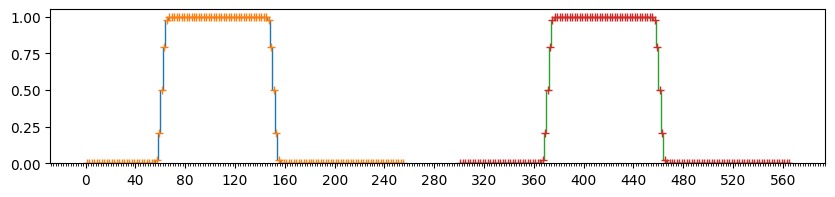

CQ1


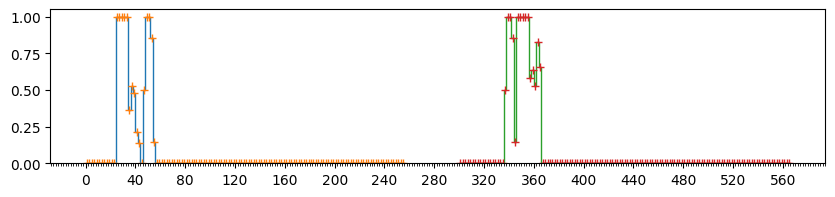

RQ1CAP


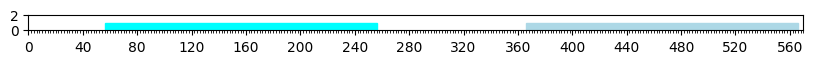

In [1]:
import math
import numpy as np
from numpy.typing import NDArray
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import qubecalib.neopulse as pls
import qubecalib.e7utils as qce7
from qubecalib.neopulse import Sequence, SubSequence, Slot, Series, Flushleft, Flushright, RaisedCosFlatTop, TargetHolder, Blank, Range, Branch, SubSequenceBranch
from qubecalib.neopulse import Modifier, RaisedCosFlatTop, Item
from typing import Optional, List, Tuple
%matplotlib inline

# e7 用の小技
# SubSequence の最初を Flushleft + Blank で始めると SubSequence の長さを 16 words (64 amples, 128 ns) に
# アライメントしやすい．e7 の WaveChunk と 1:1 で対応するのでわかりやすい．

with Sequence() as seq:
    with SubSequence(duration=300e-9):
        with Flushright():
            # 例えばこの後の Rectangle をバシッと出したい場合 Readout が 2ns にアライメントされるように入れる
            Blank(duration=56e-9)
            with Series():
                pls.Rectangle(10e-9).set_target("CQ1")
                a = pls.Arbit(10e-9).set_target("CQ1")
                RaisedCosFlatTop(duration=11e-9, rise_time=4e-9).set_target("CQ1")
        with Flushleft():
            with Series():
                RaisedCosFlatTop(duration=100e-9, rise_time=10e-9).set_target("RQ1GEN")
            Range(duration=200e-9).set_target("RQ1CAP")
    with SubSequence():
        with Flushright():
            Blank(duration=66e-9)
            with Series():
                RaisedCosFlatTop(duration=11e-9, rise_time=4e-9).set_target("CQ1")
                pls.Rectangle(10e-9).set_target("CQ1")
                b = pls.Arbit(10e-9).set_target("CQ1")
        with Flushleft():
            with Series():
                RaisedCosFlatTop(duration=100e-9, rise_time=10e-9).set_target("RQ1GEN")
            Range(duration=200e-9).set_target("RQ1CAP")


a.iq[:] = np.random.rand(*a.iq.shape)
b.iq[:] = np.random.rand(*b.iq.shape)

seq._tree.place_slots()

# targets_items = seq._get_group_items_by_target()
# edges_items = seq._tree._nodes_items
# print(targets_items)
# print(edges_items)

sampled_sequences = seq._create_sampled_sequence()


for target_name, sequence in sampled_sequences.items():
    if not isinstance(sequence, pls.GenSampledSequence):
        continue
    print(target_name)

    fig = plt.figure(figsize=(10, 2))
    ax = plt.gca()

    durations = [_ for _ in sum([[sequence.prev_blank]] + [[_.real.shape[0],_.post_blank] for _ in sequence.sub_sequences] + [[sequence.post_blank]], []) if _ is not None]
    positions = [sum(durations[:i+1]) for i, _ in enumerate(durations)][::2]
    ts = [np.arange(_.real.shape[0]+1) + offset for _, offset in zip(sequence.sub_sequences, positions)]
    for t, _ in zip(ts, sequence.sub_sequences):
        ax.stairs(_.real, edges=t*2, linewidth=1)
        ax.plot(((t[:-1]))*2+1, _.real, "+")

    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(40))
    ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(20))
    plt.show()

# sampled_cap_sequence = seq._create_cap_sampled_sequence_()

for target_name, seq in sampled_sequences.items():
    if not isinstance(seq, pls.CapSampledSequence):
        continue
    print(target_name)

    chain = qce7._convert_cap_sampled_sequence_to_blanks_and_durations_chain(seq)
    positions = [sum(chain[:i])for i, _ in enumerate([_ for _ in [0] + chain if _ is not None])]

    fig = plt.figure(figsize=(10, 0.2))
    ax = fig.gca()

    for i, (begin, end) in enumerate(zip(positions[1:-1:2],positions[2::2])):
        ax.add_patch(patches.Rectangle(xy=(begin*2, 0), width=(end-begin)*2, height=1, color='lightblue' if i % 2 else 'cyan'))

    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(40))
    ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(20))
    ax.set_xlim(0, math.ceil(positions[-1] * 2 / 10) * 10)
    ax.set_ylim(0, 2)
    plt.show()

# print([0] + chain)
# print(positions)
# positions
# sampled_sequences, sampled_cap_sequence

({'CQ1': {1: [RaisedCosFlatTop(duration=1.05e-08, begin=0.0)]},
  'RQ1CAP': {1: [Range(duration=2e-07, begin=1.0499999999999995e-08)]},
  'RQ1GEN': {1: [RaisedCosFlatTop(duration=1e-07, begin=6.049999999999999e-08)]}},
 {1: SubSequenceBranch(duration=2.1049999999999999e-07, begin=0.0, next_node=1, root_node=2, post_blank=0.0, repeats=1),
  2: Dummy(begin=0.0),
  3: RaisedCosFlatTop(duration=1.05e-08, begin=0.0),
  4: FlushleftBranch(duration=2e-07, begin=1.0499999999999995e-08, next_node=4, root_node=5),
  5: Dummy(begin=1.05e-08),
  6: SeriesBranch(duration=1.5e-07, begin=1.0499999999999995e-08, next_node=6, root_node=7),
  7: Dummy(begin=1.05e-08),
  10: Range(duration=2e-07, begin=1.0499999999999995e-08),
  8: Blank(duration=5e-08, begin=1.0499999999999995e-08),
  9: RaisedCosFlatTop(duration=1e-07, begin=6.049999999999999e-08)},
 Tree(list,
      {0: [1, 2],
       2: [3],
       3: [4, 5],
       5: [6, 7, 10],
       7: [8],
       8: [9],
       1: [],
       4: [],
       6: []

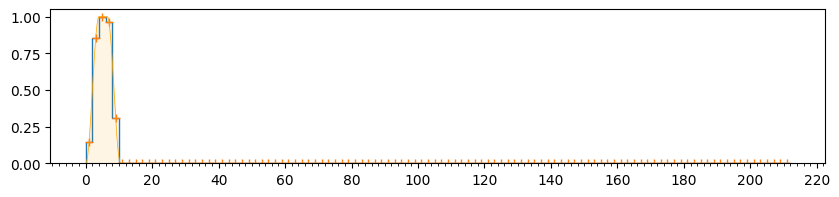

In [7]:
import numpy as np
from numpy.typing import NDArray
import matplotlib as mpl
import matplotlib.pyplot as plt
import qubecalib.neopulse as pls
from qubecalib.neopulse import Sequence, SubSequence, Slot, Series, Flushleft, Flushright, RaisedCosFlatTop, TargetHolder, Blank, Range, Branch, SubSequenceBranch
from qubecalib.neopulse import Modifier, RaisedCosFlatTop
from typing import Optional, List
%matplotlib inline

# e7 用の小技
# SubSequence の最初を Flushleft + Blank で始めると SubSequence の長さを 16 words (64 amples, 128 ns) に
# アライメントしやすい．e7 の WaveChunk と 1:1 で対応するのでわかりやすい．

with Sequence() as seq:
    with SubSequence():
        RaisedCosFlatTop(duration=10.5e-9, rise_time=4e-9).set_target("CQ1")
        with Flushleft():
            with Series():
                Blank(50e-9)
                RaisedCosFlatTop(100e-9).set_target("RQ1GEN")
            Range(200e-9).set_target("RQ1CAP")
    # with SubSequence():
    #     RaisedCosFlatTop(duration=10.5e-9, rise_time=4e-9).set_target("CQ1")
    #     with Flushleft():
    #         with Series():
    #             Blank(50e-9)
    #             RaisedCosFlatTop(100e-9).set_target("RQ1GEN")
    #         Range(200e-9).set_target("RQ1CAP")


seq._tree.place_slots()

targets_items = seq._get_group_items_by_target()
nodes_items = seq._tree._nodes_items

subseq_node = [node for node, _ in targets_items["CQ1"].items() if _][0]
subseq = nodes_items[subseq_node]
slots = targets_items["CQ1"][subseq_node]

sampler = pls.Sampler(subseq, slots)
v, t, ts = sampler.sample(
    over_sampling_ratio = 1,
    difference_type="center",
)

fig = plt.figure(figsize=(10, 2))
ax = fig.gca()

ax.stairs(np.real(v), edges=t*1e+9, linewidth=1)
ax.locator_params(axis="x", nbins=len(t)-1)
ax.plot(ts*1e+9, np.real(v), "+")

v, t, _ = sampler.sample(
    over_sampling_ratio = 100,
    difference_type="back",
)

ax.plot(t*1e+9, np.real(v), color="orange", linewidth=0.5)
# # plt.plot(t*1e+9, np.imag(v), linewidth=0.5)
ax.fill_between(t*1e+9, np.real(v), color="orange", alpha=0.1)

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(20))
ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(10))

targets_items, nodes_items, seq._tree._tree._tree

In [8]:
import qubecalib.e7utils as e7utils
from qubecalib.neopulse import Sequence, SubSequence, Slot, Series, Flushleft, Flushright, RaisedCosFlatTop, TargetHolder, Blank, Range, Branch, SubSequenceBranch
from qubecalib.neopulse import Modifier, RaisedCosFlatTop, Item
from typing import Optional, List, Tuple

with Sequence() as seq:
    RaisedCosFlatTop(duration=11e-9, rise_time=4e-9).set_target("CQ1")
    with Flushleft():
        RaisedCosFlatTop(duration=100e-9, rise_time=10e-9).set_target("RQ1GEN")
        Range(duration=200e-9).set_target("RQ1CAP")

seq._tree.place_slots()
sampled_sequences = seq._create_sampled_sequence()

# e7utils.create_wseq(sampled_sequences["CQ1"])

In [3]:
sampled_sequences["CQ1"]

GenSampledSequence(target_name='CQ1', prev_blank=0, post_blank=None, repeats=None, sampling_period=2e-09, sub_sequences=[GenSampledSubSequence(real=array([0.14644661, 0.85355339, 1.        , 1.        , 0.5       ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.   

In [6]:
import e7awgsw
1/e7awgsw.AwgCtrl.SAMPLING_RATE

2e-09